## Imports

In [17]:
import neural_network as nn
import scipy.io
import numpy as np

%matplotlib inline

## Load and process training samples.

In [18]:
mat_data = scipy.io.loadmat('digits_data/hand_written_digits.mat')
X = mat_data['X']
y = mat_data['y']
augmented_matrix = np.append(X, y, axis=1)
np.random.shuffle(augmented_matrix)
X = augmented_matrix[:, :-1]
y = augmented_matrix[:, -1]

## Setup trainer

In [19]:
# Learning rate
alpha = 0.3
# Regularization
lamb = 10
# Random Theta rang
EPSILON_INIT = 0

digits_nn = nn.NeuralNetwork(X, y, alpha, lamb, EPSILON_INIT, 400, 25)

## Start training

In [20]:
digits_nn.train(iter_limit=0, time_limit=3600 * 10, grad_check=True, info_print_frequency=100, save_to_file=False)

Started training...
Started gradient checking...
Checking 100 randomly selected thetas...
Gradient check passed.
Used 9.85s for gradient checking.
--------------------------------------------------
Iter: 1, duration: 15.01s, J(θ_train): 6.820932687249661, J(θ_cv): 3.6762465313798702, test set accuracy: 9.70%
Iter: 100, duration: 368.00s, J(θ_train): 2.849632053375244, J(θ_cv): 4.895636916058688, test set accuracy: 77.50%
Iter: 200, duration: 733.71s, J(θ_train): 2.072971878051758, J(θ_cv): 4.676610483646218, test set accuracy: 84.10%
Iter: 300, duration: 1101.59s, J(θ_train): 1.7356169408162436, J(θ_cv): 4.619449068161635, test set accuracy: 86.70%
Iter: 400, duration: 1475.15s, J(θ_train): 1.5601714070638022, J(θ_cv): 4.558475920439514, test set accuracy: 88.20%
Iter: 500, duration: 1873.78s, J(θ_train): 1.4515350697835285, J(θ_cv): 4.4922404102523235, test set accuracy: 89.20%
Iter: 600, duration: 2252.41s, J(θ_train): 1.3759672927856446, J(θ_cv): 4.426688327635215, test set accuracy

## Print an example of prediction.

In [21]:
num_to_predict = 20
print('Expected:')
for ele in y[-num_to_predict:]:
    print('{0:2}'.format(int(ele)), end=' ')
print()
print('Prediction:')
for ele in digits_nn.predict(np.matrix(X[-num_to_predict:]))[0]:
    print('{0:2}'.format(int(ele)), end=' ')

Expected:
10  3  2  3  9 10  2  8  6  6  5  3  4  6  5  3  8  1  5  8 
Prediction:
10  3  3  3  9 10  2  8  6  6  5  3  4  5  3  3  8  1  5 10 

## Plot cost and accuracy graph.

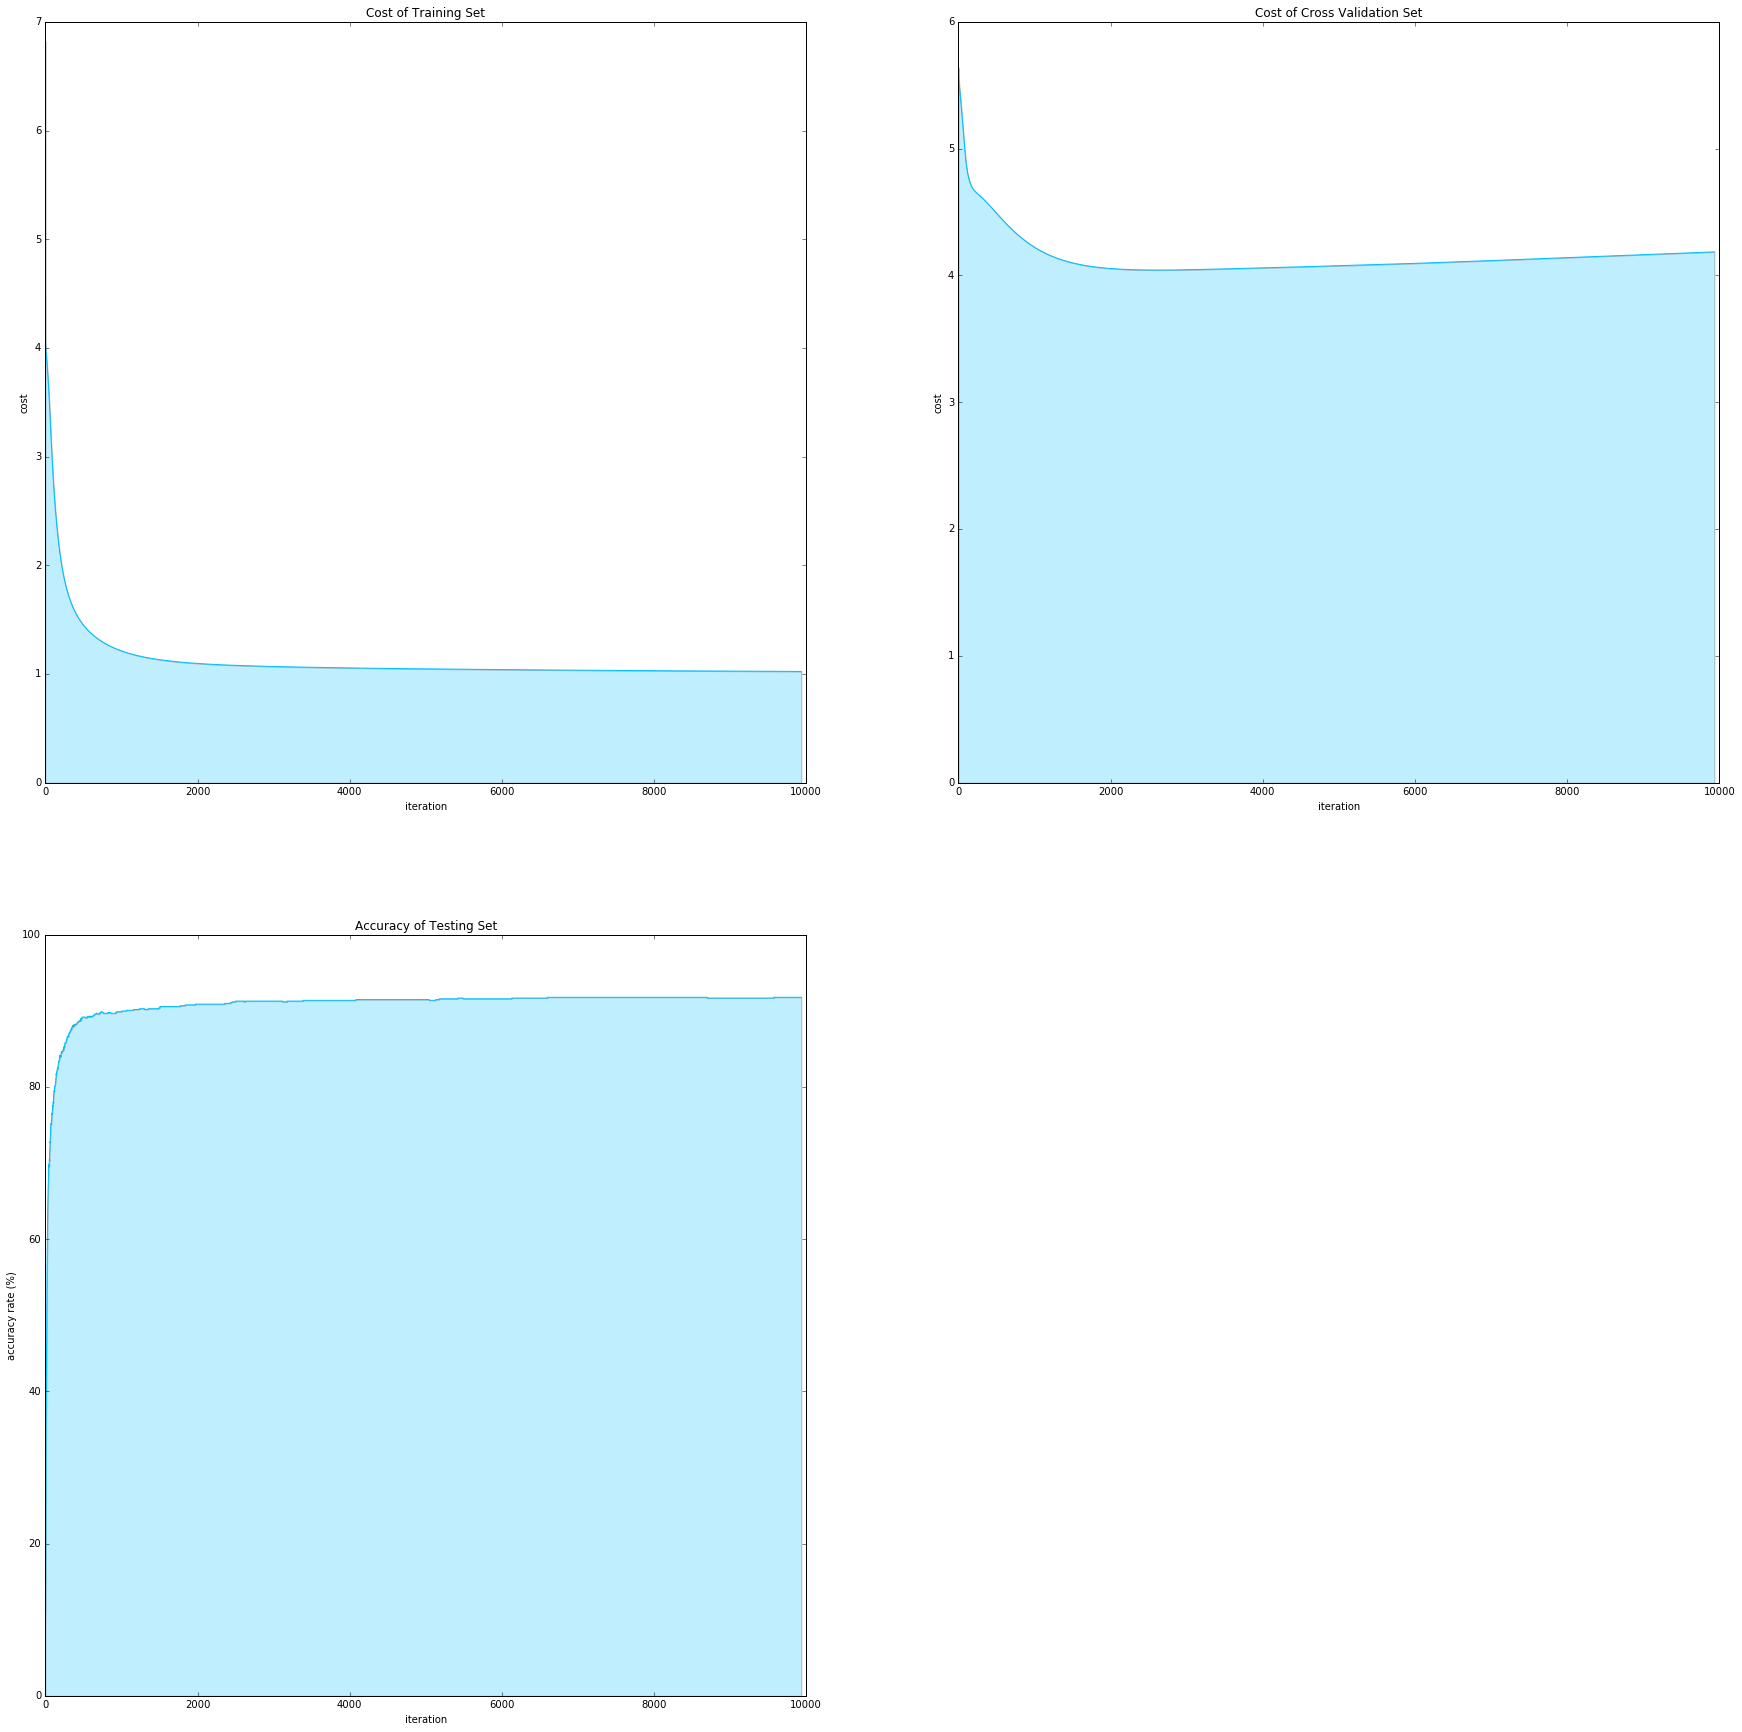

In [22]:
digits_nn.plot_training_info(color='#00BFFF')
digits_nn.show_plot()

## Visualize Theta

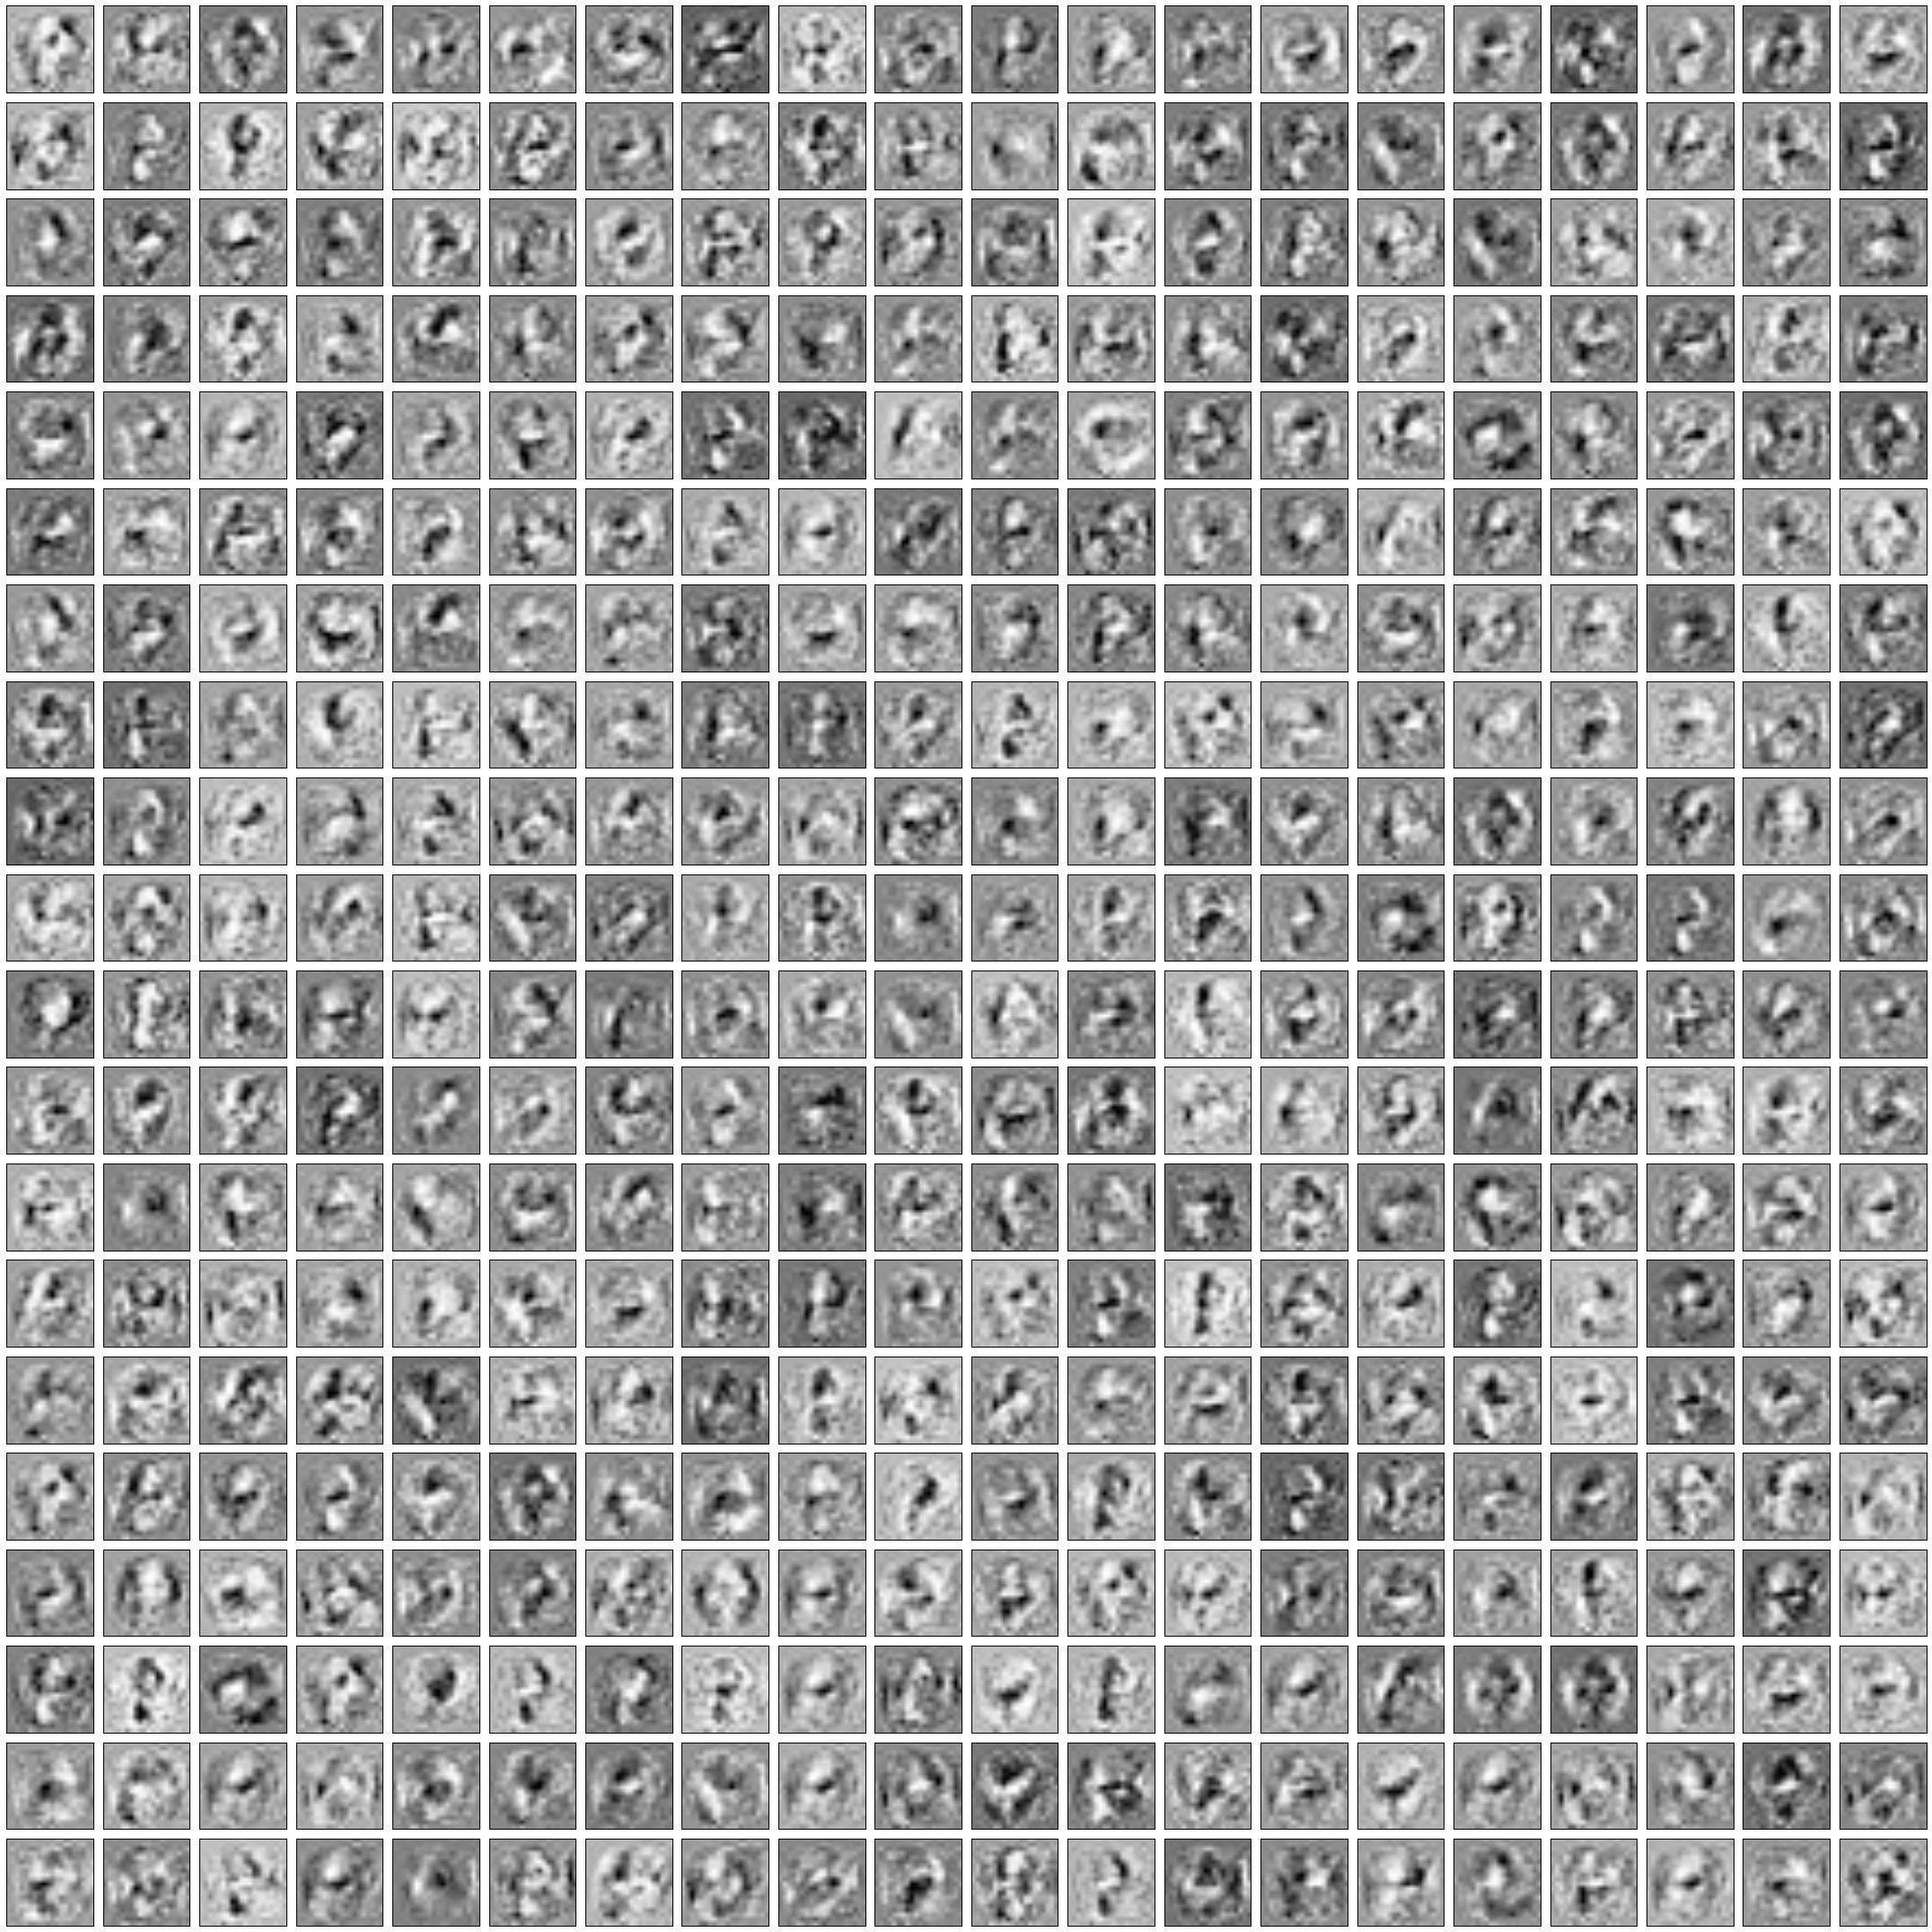

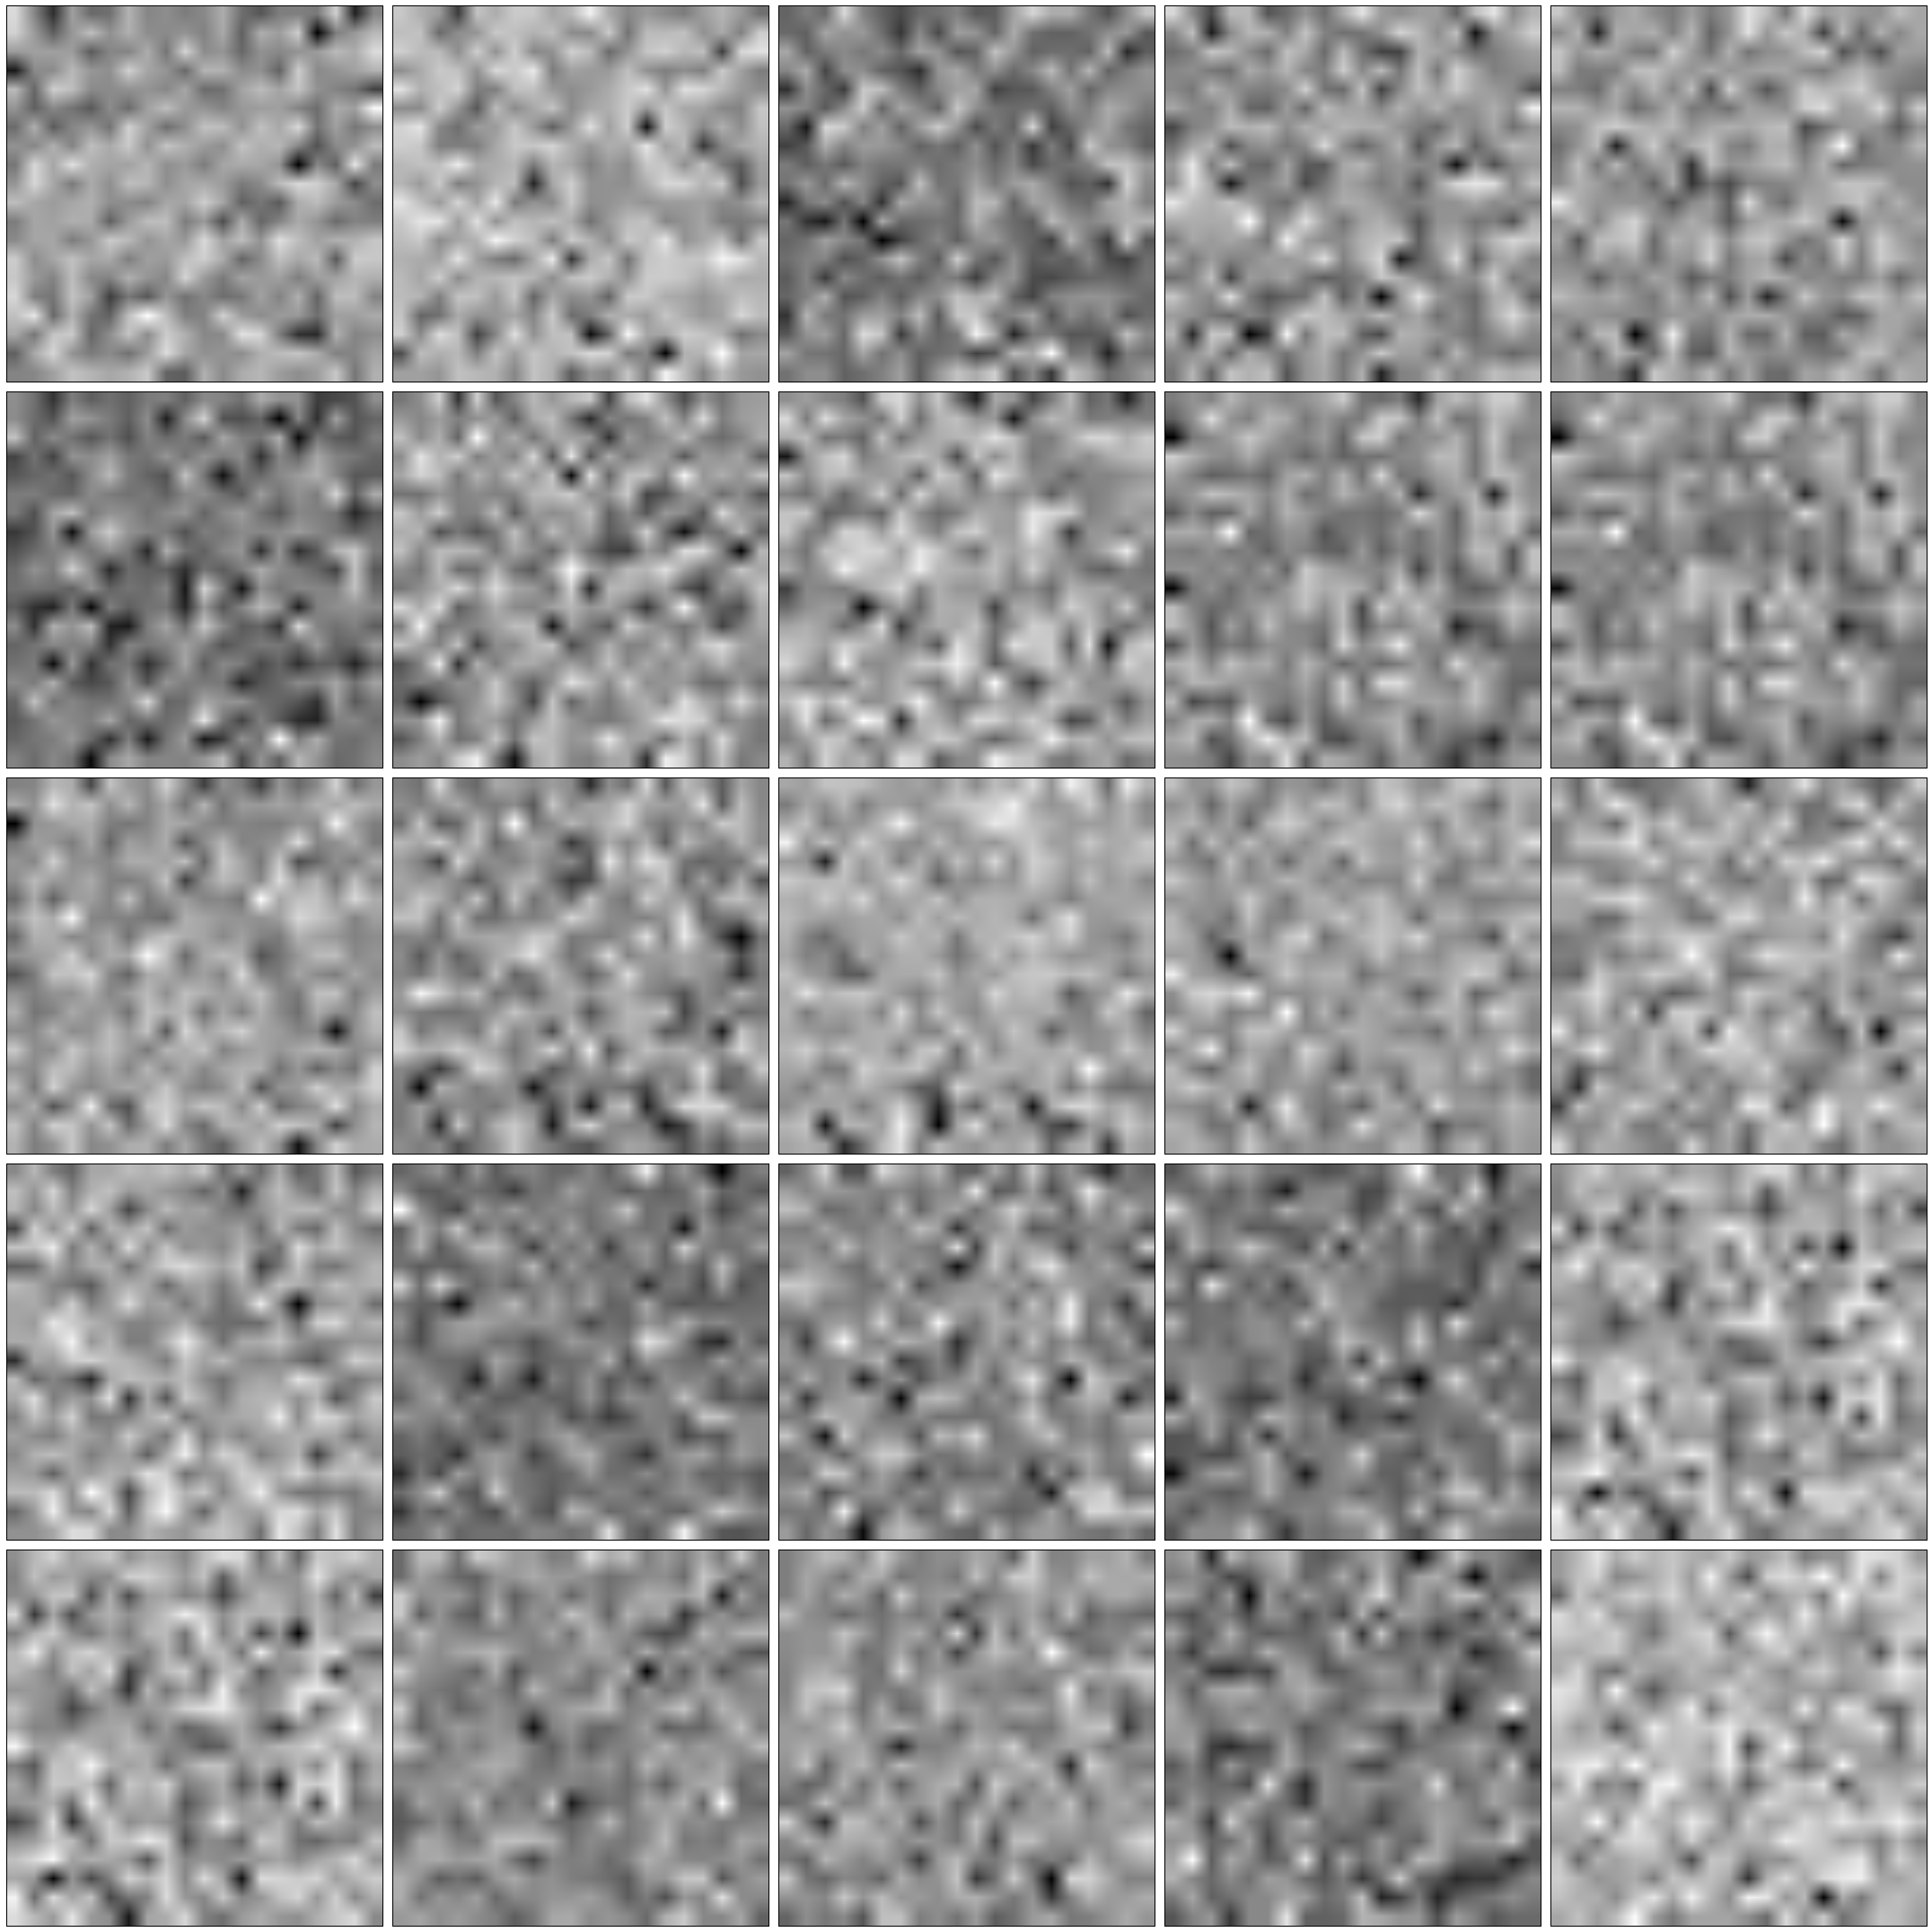

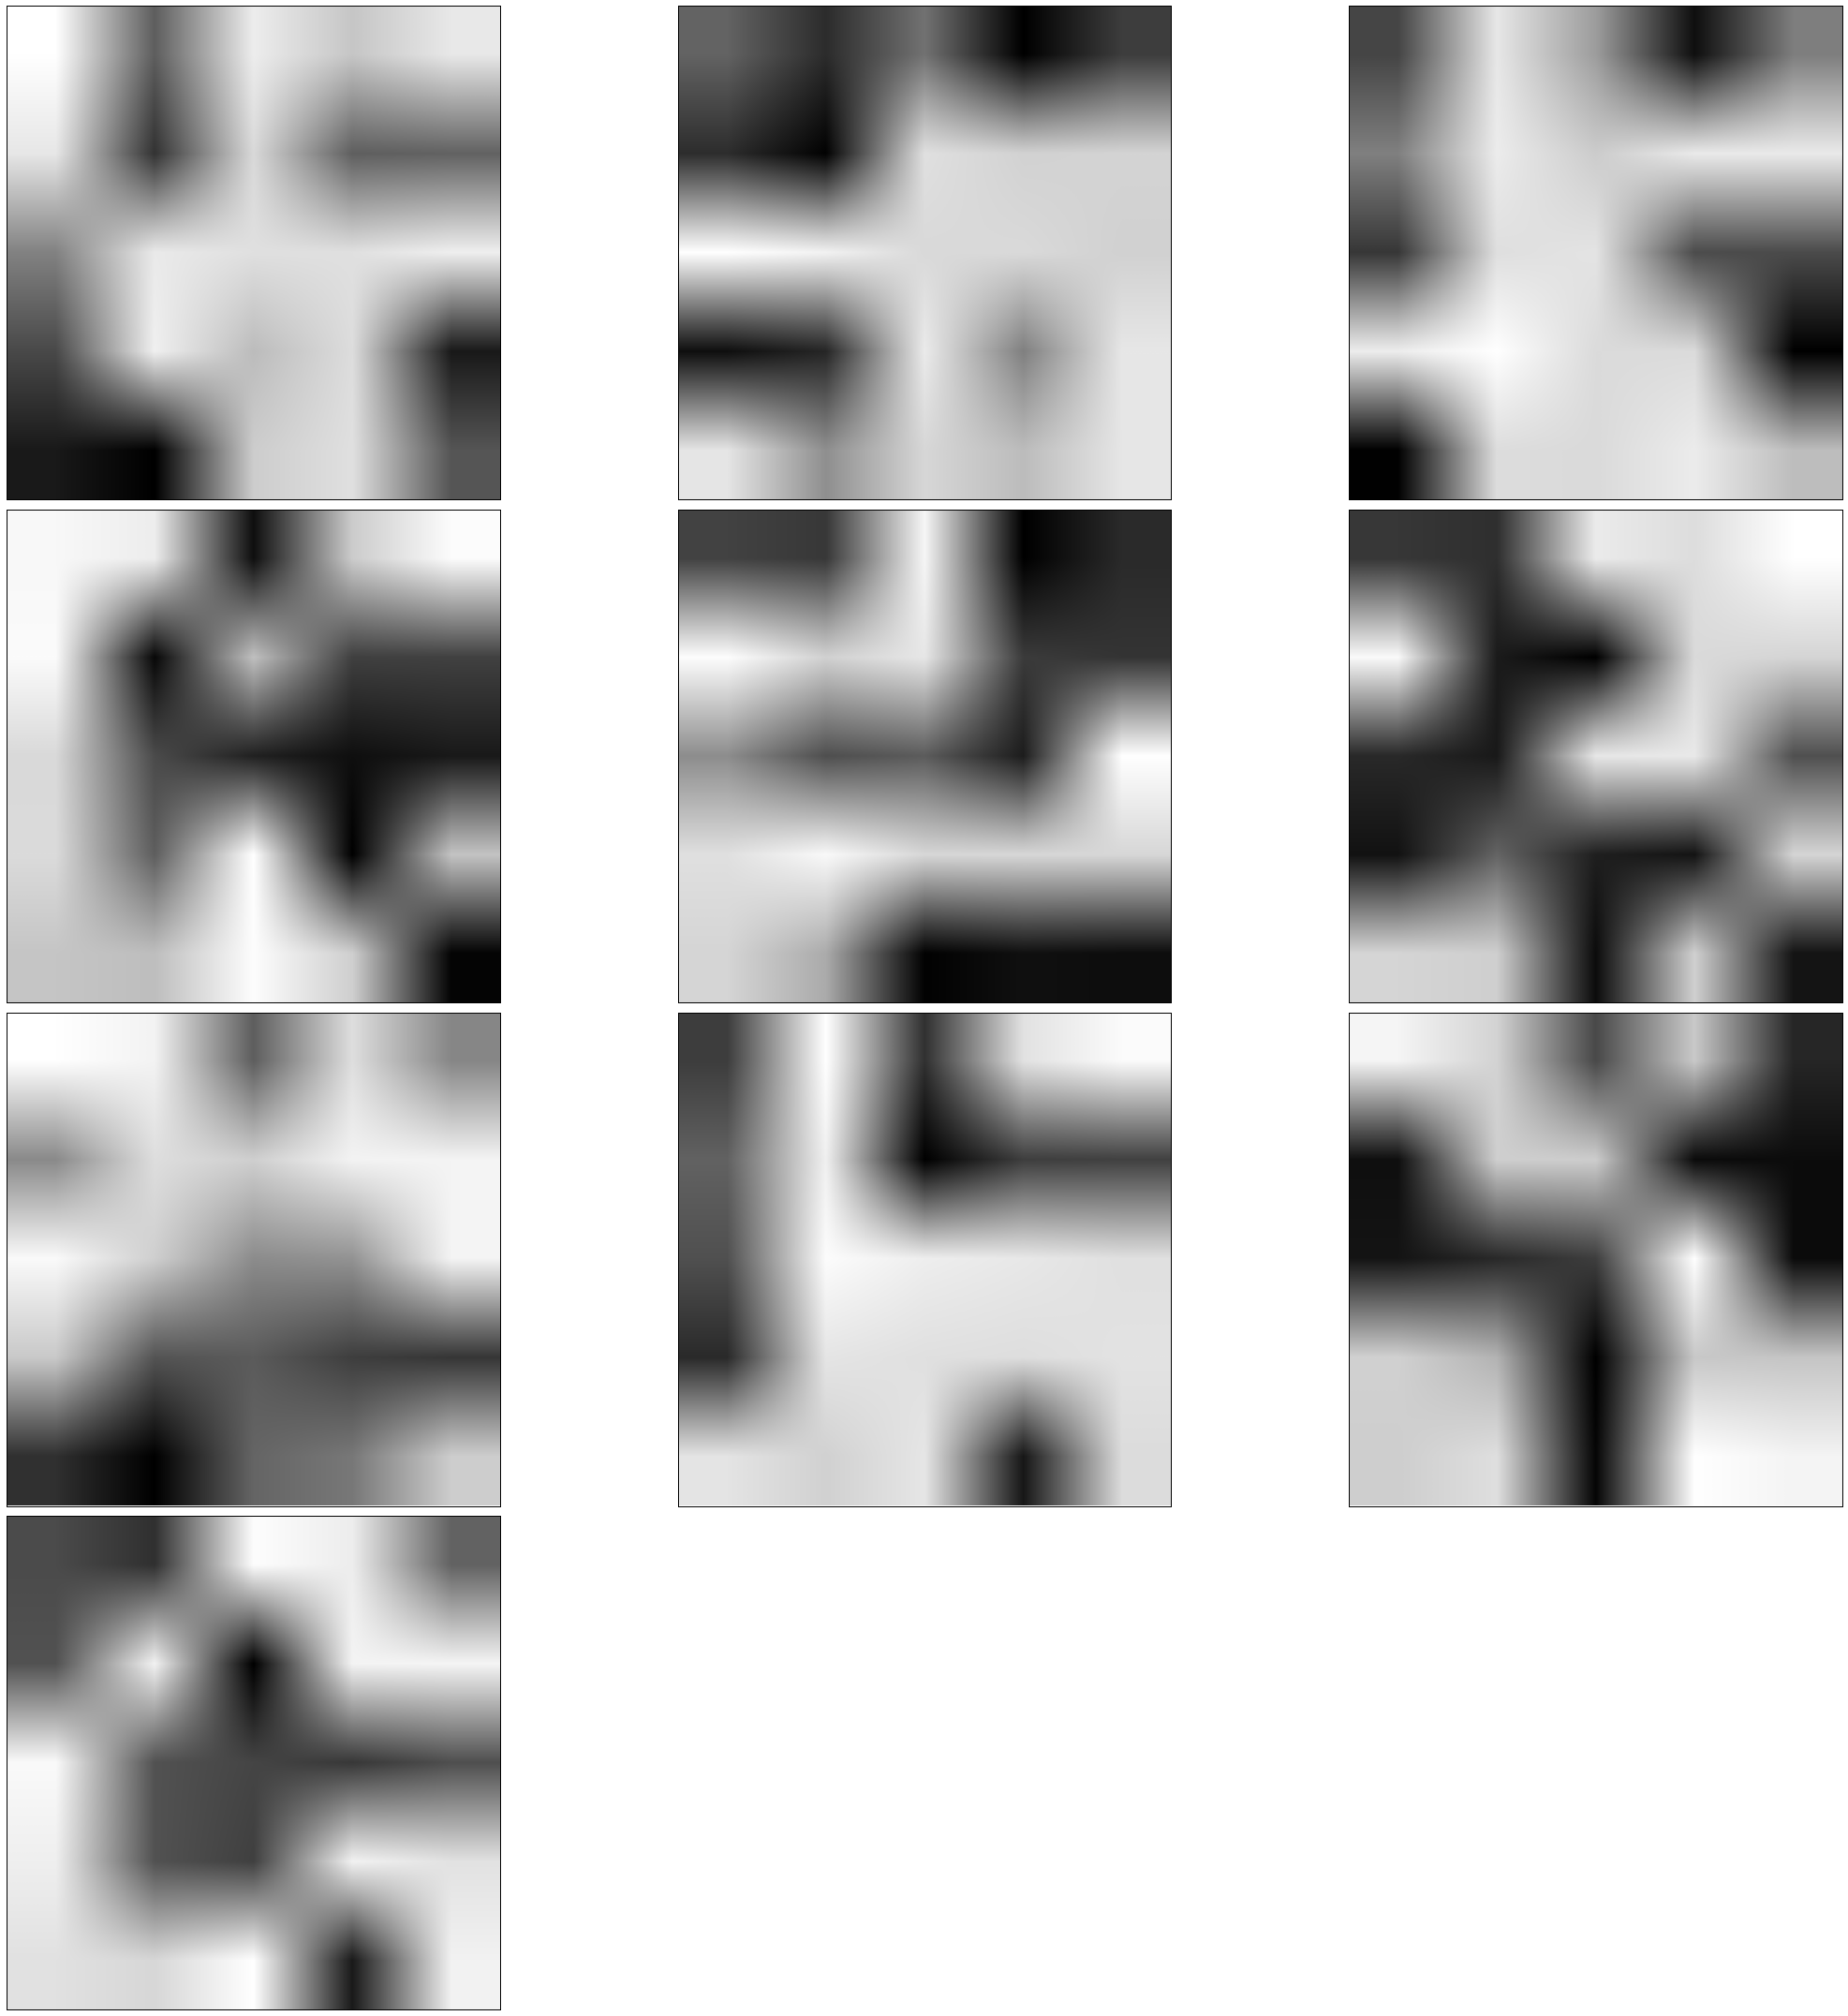

In [23]:
digits_nn.visualize_Theta(cmap='Greys_r')
digits_nn.show_plot()